# Credit Fraud Detection

In [1]:
# Imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df = pd.read_csv("credit_fraud.zip", compression="zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Show information about the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Count the number of rows for each class
val_counts = df["Class"].value_counts()
val_counts

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Show the proportion of each class
print("Non-fraud:", val_counts[0]/len(df) * 100)
print("Fraud:", val_counts[1]/len(df) * 100)

Non-fraud: 99.82725143693798
Fraud: 0.1727485630620034


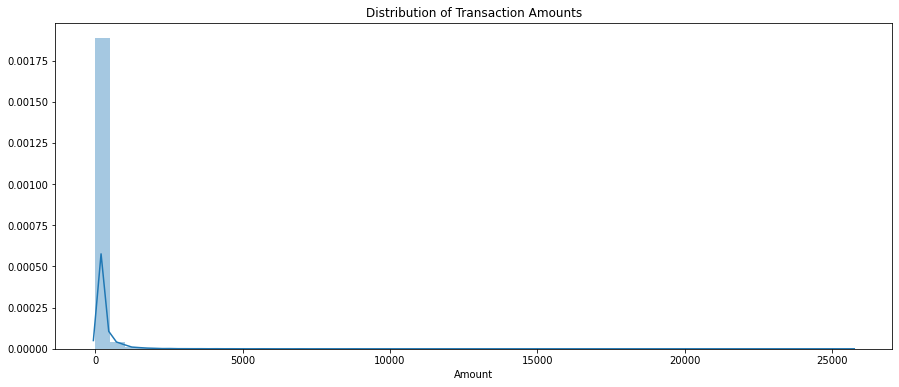

In [7]:
# Plot the distribution of the transaction amounts
plt.figure(figsize=(15, 6))
sns.distplot(df["Amount"])
plt.title("Distribution of Transaction Amounts")
plt.show()

In [8]:
# Scale the times and amounts
rs = RobustScaler()
df["Time"] = rs.fit_transform(df["Time"].values.reshape(-1,1))
df["Amount"] = rs.fit_transform(df["Amount"].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [9]:
# Shuffle and undersample the data
seed = 2
df = df.sample(frac=1, random_state=seed)
non_fraud_df = df[df["Class"] == 0][:492]
fraud_df = df[df["Class"] == 1]
sample_df = pd.concat([non_fraud_df, fraud_df]).sample(frac=1, random_state=seed)
sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
240106,0.772295,-1.091862,1.524808,-0.213761,-0.025370,0.793683,-1.042213,1.528103,0.034087,-0.786397,...,0.141985,0.493871,-0.371856,0.010134,0.608552,-0.595885,0.115793,0.104427,0.377978,0
40525,-0.521811,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,...,-0.176541,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,-0.293440,1
52521,-0.460426,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,...,-0.334417,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,1.173618,1
222821,0.686556,-0.262175,1.185463,-0.712631,-0.588096,0.573369,-0.557051,0.487555,0.505761,-0.418651,...,-0.235787,-0.724782,0.178068,0.587304,-0.471215,0.096123,0.091770,0.011338,-0.181793,0
88897,-0.262585,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,-0.292042,1


In [10]:
# Show the proportion of each class in the new dataset
sample_df["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [11]:
# Check for any correlations between the features and the class
corr = sample_df.corr()
correlated_cols = corr["Class"][abs(corr["Class"]) >= 0.5].drop("Class")
correlated_cols

V3    -0.561112
V4     0.705482
V9    -0.557945
V10   -0.624296
V11    0.687857
V12   -0.684529
V14   -0.748040
V16   -0.596133
V17   -0.559774
Name: Class, dtype: float64

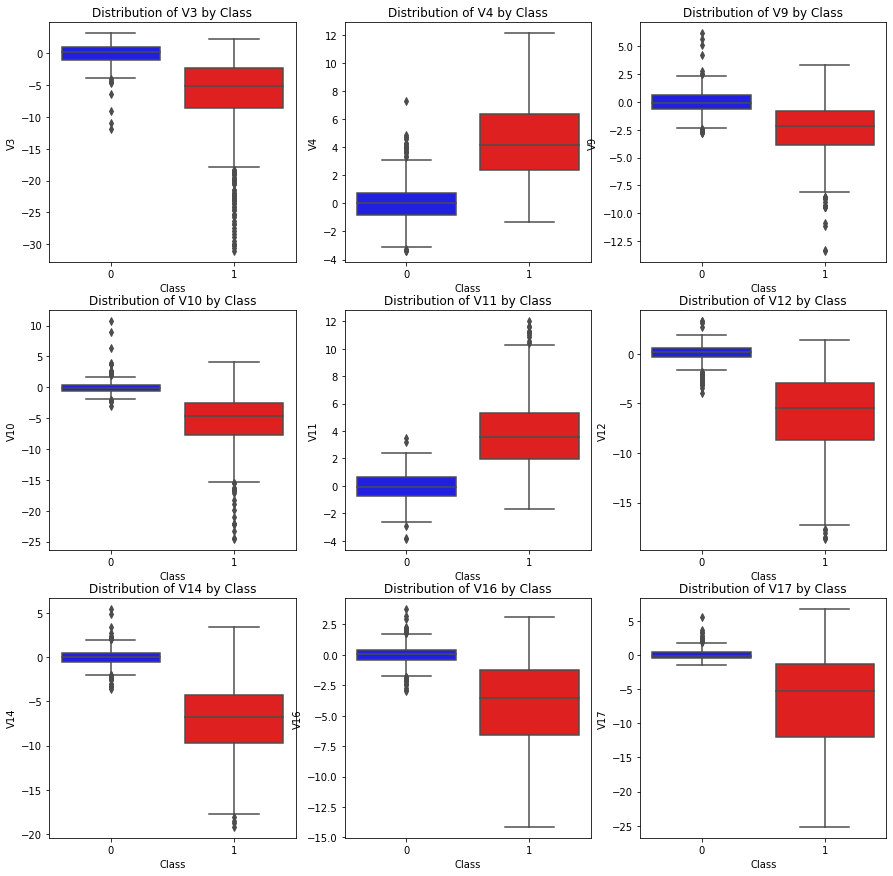

In [12]:
# Plot the boxplots of the columns with correlations above 0.5
f, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for index, pc in enumerate(correlated_cols.index):
    row, col = divmod(index, 3)
    sns.boxplot(x="Class", y=pc, data=sample_df, palette=["#0000FF", "#FF0000"], ax=axes[row][col])
    axes[row][col].set_title(f"Distribution of {pc} by Class")

plt.show()

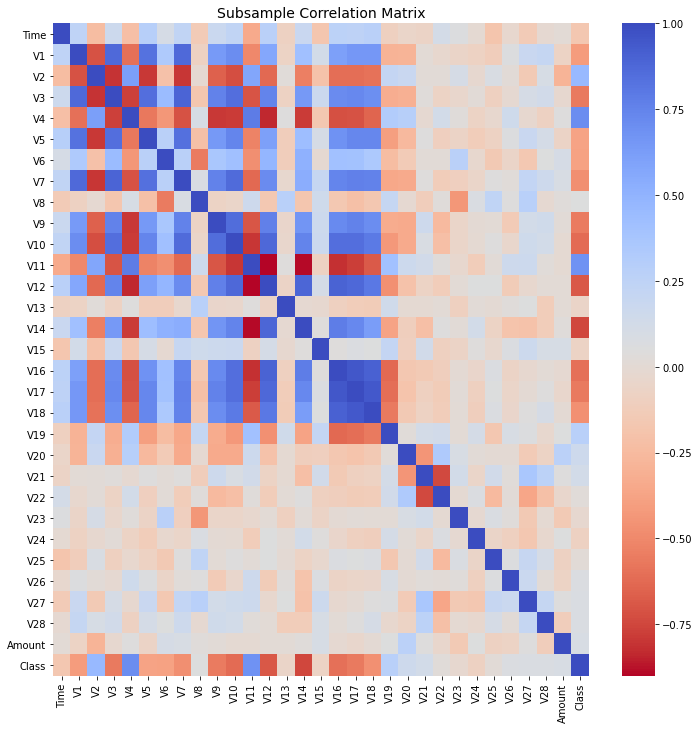

In [13]:
# Plot the correlation matrix of the new dataset
plt.figure(figsize=(12, 12))
sns.heatmap(corr, cmap="coolwarm_r")
plt.title("Subsample Correlation Matrix", fontsize=14)
plt.show()

In [14]:
# Removing outliers from the correlated columns
for pc in correlated_cols.index:
    v_fraud = sample_df[pc].loc[sample_df["Class"] == 1]
    q25 = np.percentile(v_fraud, 25)
    q75 = np.percentile(v_fraud, 75)
    v_iqr = q75 - q25
    
    v_cutoff = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cutoff, q75 + v_cutoff
    outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
    
    # Drop the extreme outliers
    sample_df = sample_df.drop(sample_df[(sample_df[pc] > v_upper) | (sample_df[pc] < v_lower)].index)

In [15]:
# Identify the features and the target
X = sample_df.drop("Class", axis=1)
y = sample_df["Class"]

In [16]:
# Try different dimensionality reduction techniques to cluster the data
X_tsne = TSNE(n_components=2, random_state=seed).fit_transform(X)
X_pca = PCA(n_components=2, random_state=seed).fit_transform(X)
X_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=seed).fit_transform(X)

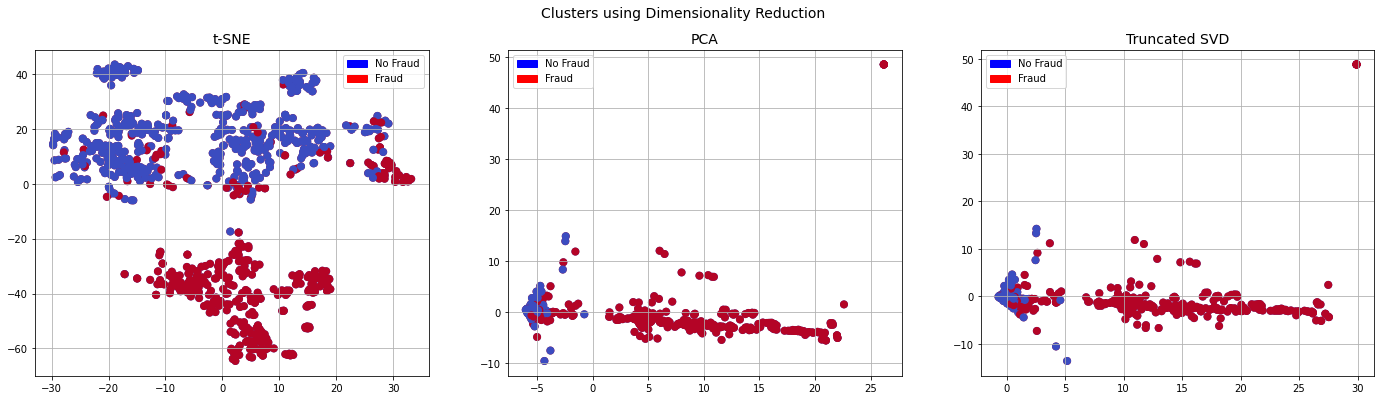

In [17]:
# Plot the clusters
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))
fig.suptitle("Clusters using Dimensionality Reduction", fontsize=14)

blue_patch = mpatches.Patch(color="#0000FF", label="No Fraud")
red_patch = mpatches.Patch(color="#FF0000", label="Fraud")

# t-SNE scatter plot
ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=(y == 0), cmap="coolwarm", label="No Fraud", linewidths=2)
ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=(y == 1), cmap="coolwarm", label="Fraud", linewidths=2)
ax1.set_title("t-SNE", fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])

# PCA scatter plot
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=(y == 0), cmap="coolwarm", label="No Fraud", linewidths=2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=(y == 1), cmap="coolwarm", label="Fraud", linewidths=2)
ax2.set_title("PCA", fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_svd[:, 0], X_svd[:, 1], c=(y == 0), cmap="coolwarm", label="No Fraud", linewidths=2)
ax3.scatter(X_svd[:, 0], X_svd[:, 1], c=(y == 1), cmap="coolwarm", label="Fraud", linewidths=2)
ax3.set_title("Truncated SVD", fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [18]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [19]:
# Implement several classifiers
classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [20]:
# Train each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"Training score for {name}: {round(training_score.mean(), 2) * 100}%")

Training score for Logisitic Regression: 92.0%
Training score for Support Vector Classifier: 92.0%
Training score for KNN: 92.0%
Training score for Decision Tree Classifier: 88.0%


In [21]:
# Find the best parameters each model

# Logistic Regression
params_lr = {"penalty": ["1", "l2"], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lr = GridSearchCV(LogisticRegression(), params_lr)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

# K-Nearest Neighbors
params_knn = {"n_neighbors": [2, 3, 4], "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]}
grid_knn = GridSearchCV(KNeighborsClassifier(), params_knn)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# Support Vector Classifier
params_svc = {"C": [0.5, 0.7, 0.9, 1], "kernel": ["linear", "poly", "rbf", "sigmoid"]}
grid_svc = GridSearchCV(SVC(), params_svc)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_

# Decision Tree Classifier
params_tree = {"criterion": ["gini", "entropy"], "max_depth": [2, 3], "min_samples_leaf": [5, 6]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), params_tree)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_

In [22]:
# Perform cross-validation using the tuned models
score_lr = cross_val_score(best_lr, X_train, y_train, cv=5)
print(f"Logistic Regression Cross Validation Score: {round(score_lr.mean()*100, 2)}%")

score_knn = cross_val_score(best_knn, X_train, y_train, cv=5)
print(f"KNN Cross Validation Score: {round(score_knn.mean()*100, 2)}%")

score_svc = cross_val_score(best_svc, X_train, y_train, cv=5)
print(f"Support Vector Classifier Cross Validation Score: {round(score_knn.mean()*100, 2)}%")

score_tree = cross_val_score(best_tree, X_train, y_train, cv=5)
print(f"Decision Tree Classifier Cross Validation Score: {round(score_tree.mean()*100, 2)}%")

Logistic Regression Cross Validation Score: 92.41%
KNN Cross Validation Score: 92.26%
Support Vector Classifier Cross Validation Score: 92.26%
Decision Tree Classifier Cross Validation Score: 93.87%


In [23]:
# Make the cross-validation predictions
pred_lr = cross_val_predict(best_lr, X_train, y_train, cv=5, method="decision_function")
pred_knn = cross_val_predict(best_knn, X_train, y_train, cv=5)
pred_svc = cross_val_predict(best_svc, X_train, y_train, cv=5, method="decision_function")
pred_tree = cross_val_predict(best_tree, X_train, y_train, cv=5)

In [24]:
# Compute the ROC AUC for each model
print("ROC AUC of Logistic Regression:", roc_auc_score(y_train, pred_lr))
print("ROC AUC of K-Nearest Neighbors:", roc_auc_score(y_train, pred_knn))
print("ROC AUC of Support Vector Classifier:", roc_auc_score(y_train, pred_svc))
print("ROC AUC of Decision Tree Classifier:", roc_auc_score(y_train, pred_tree))

ROC AUC of Logistic Regression: 0.9675928325816875
ROC AUC of K-Nearest Neighbors: 0.915271370068944
ROC AUC of Support Vector Classifier: 0.9726815613498523
ROC AUC of Decision Tree Classifier: 0.9334231852504622


In [25]:
# Compute the test accuracy for each model
print("Test accuracy of Logistic Regression:", accuracy_score(y_test, best_lr.predict(X_test)))
print("Test accuracy of K-Nearest Neighbors:", accuracy_score(y_test, best_knn.predict(X_test)))
print("Test accuracy of Support Vector Classifier:", accuracy_score(y_test, best_svc.predict(X_test)))
print("Test accuracy of Decision Tree Classifier:", accuracy_score(y_test, best_tree.predict(X_test)))

Test accuracy of Logistic Regression: 0.9593023255813954
Test accuracy of K-Nearest Neighbors: 0.9244186046511628
Test accuracy of Support Vector Classifier: 0.9302325581395349
Test accuracy of Decision Tree Classifier: 0.9127906976744186


In [26]:
# Show the confusion matrices of each model
print("Confusion matrix of Logistic Regression:\n", confusion_matrix(y_test, best_lr.predict(X_test)))
print("Confusion matrix of K-Nearest Neighbors:\n", confusion_matrix(y_test, best_knn.predict(X_test)))
print("Confusion matrix of Support Vector Classifier:\n", confusion_matrix(y_test, best_svc.predict(X_test)))
print("Confusion matrix of Decision Tree Classifier:\n", confusion_matrix(y_test, best_tree.predict(X_test)))

Confusion matrix of Logistic Regression:
 [[91  2]
 [ 5 74]]
Confusion matrix of K-Nearest Neighbors:
 [[91  2]
 [11 68]]
Confusion matrix of Support Vector Classifier:
 [[93  0]
 [12 67]]
Confusion matrix of Decision Tree Classifier:
 [[88  5]
 [10 69]]


In [27]:
# Use the original dataset as the test set
df_X = df.drop("Class", axis=1)
df_y = df["Class"]

print("Confusion matrix of Logistic Regression using original dataset:\n", confusion_matrix(df_y, best_lr.predict(df_X)))
print("Confusion matrix of K-Nearest Neighbors using original dataset:\n", confusion_matrix(df_y, best_knn.predict(df_X)))
print("Confusion matrix of Support Vector Classifier using original dataset:\n", confusion_matrix(df_y, best_svc.predict(df_X)))
print("Confusion matrix of Decision Tree Classifier using original dataset:\n", confusion_matrix(df_y, best_tree.predict(df_X)))

Confusion matrix of Logistic Regression using original dataset:
 [[273817  10498]
 [    50    442]]
Confusion matrix of K-Nearest Neighbors using original dataset:
 [[279654   4661]
 [    55    437]]
Confusion matrix of Support Vector Classifier using original dataset:
 [[279658   4657]
 [    61    431]]
Confusion matrix of Decision Tree Classifier using original dataset:
 [[273318  10997]
 [    46    446]]
